In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from ikmeans.ikmeans import IKMeans


In [2]:
data = pd.read_csv("data.csv", skiprows = 5, header = None, sep="\s+")
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,19890101,0,5.0,312,54,9.0,313,8.1,306,6.2,287,5.3,252,0.0,0.0,0.0,0,0.99
1,19890101,1,4.7,316,46,6.8,325,7.4,329,4.6,318,2.2,261,0.0,0.0,0.0,0,1.00
2,19890101,2,4.5,315,41,5.0,347,6.8,2,4.0,18,2.2,94,0.0,0.0,0.0,0,1.00


In [50]:
names = ("<Дата в форме ГГГГММДД:8:0>"+
         "<Время в форме ЧЧ:2:0>"+
         "<Модуль скорости ветра, м/ c :4:1>"+
       "<Направление ветра , o :3:0> <Уровень, см, 3:0> <Модуль скорости течений на поверхностном горизонте, см/ c :5:1>"+
        "<Направление течений на поверхностном горизонте , o , 0>."+
      #  "........... (все горизонты от поверхности - до дна) ............ "+
        "<Модуль скорости течений на придонном горизонте, см/ c :5:1>"+
        "<Направление течений на придонном горизонте , o , 0>"+
        "<Значительные высоты волн, м, 4:1>"+
        "<Периоды пика волн, с, 5:2>"+
        "<Средние периоды волн, с, 5:2>"+
        "<Направления волн , o ,3:0>"+
        "<Концентрация льда:4:2>").split("><")

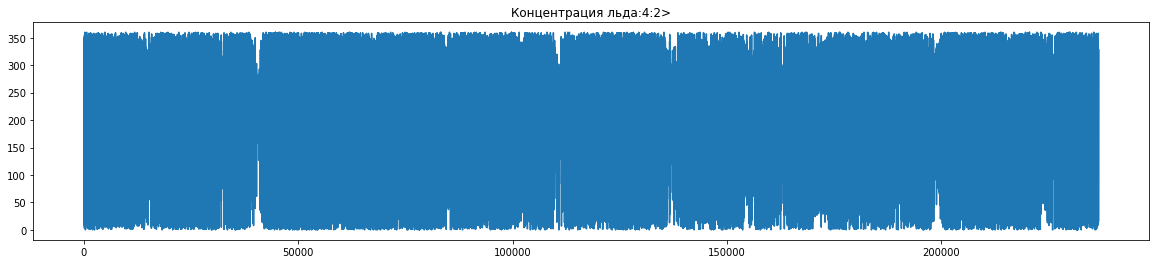

In [63]:
num = 10
plt.figure(figsize = (20,4))
train_data = data[num]
plt.title (names[num])
train_data.plot()

#### ikMeans lvl down

C:\Users\Zoya\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


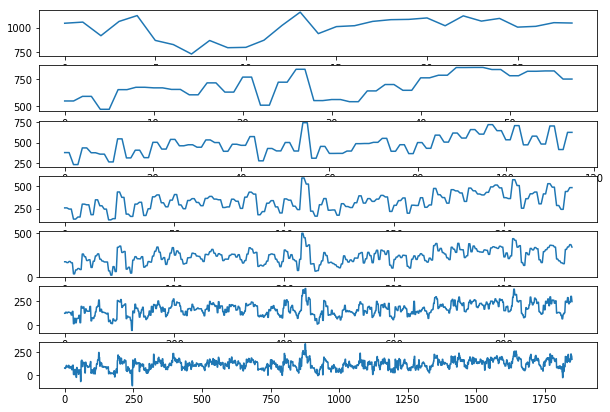

In [57]:
start_lvl = 13
deep = 7

ikmeans = IKMeans(train_data, start_lvl = start_lvl, k = 3)
plt.figure(figsize = (10,10))

for i in range(0, deep):
    plt.subplot(10,1,i+1)      
    plt.plot(ikmeans.cur_cA)
    
    ikmeans.next_lvl()
    ikmeans.fit()

#### ikMeans clusters plot

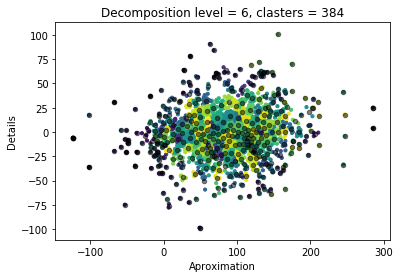

In [58]:
ikmeans.plot_clusters()

#### ikMeans one cluster plot

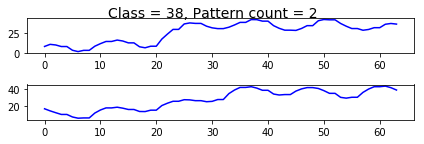

In [59]:
ikmeans.clasters[38].plot()

#### ikMeans sorted clusters plot 

In [60]:
patterns = ikmeans.clasters.sorted_patterns

C:\Users\Zoya\Anaconda3\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


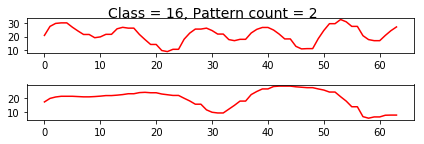

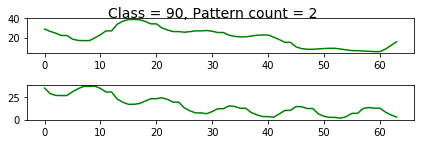

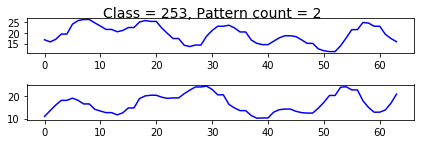

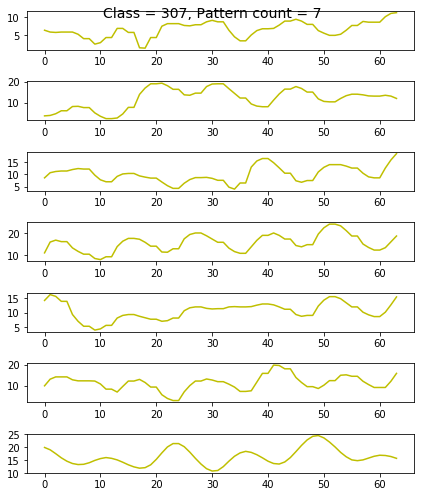

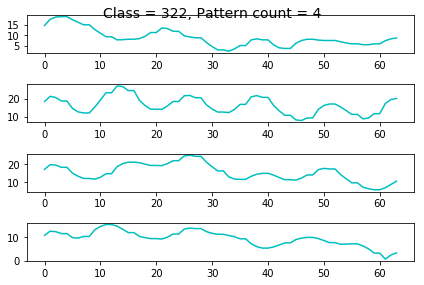

In [61]:
patterns[0].plot(color = 'r', save = 'True')
patterns[8].plot(color = 'g', save = 'True')
patterns[29].plot(color = 'b', save = 'True')
patterns[235].plot(color = 'y', save = 'True')
patterns[330].plot(count = 4, color = 'c', save = 'True')
